## Week 8
### 1. Building a simple biosphere carbon box model in Python

(For Week 7 notes, see Prof Randerson's notes under modules 4 and 5. We looked at CMIP6 future projections and mapping with cartopy)

Relevant equations

\begin{equation*}
C_b(t) = C_b(t-1) + (NPP - R_h)
\end{equation*}


\begin{equation*}
NPP(t) = NPP(0) [ 1+\beta \ln \frac {CO_2(t)}{CO_2(0)} ]
\end{equation*}



In [1]:
import numpy as np
import matplotlib.pyplot as py

In [2]:
filedata = np.loadtxt('ObsCO2.txt', skiprows=1, delimiter='\t')
date = filedata[:,0]
CO2obs = filedata[:,1]

In [3]:
print('start date', date[0], 'end date', date[-1])

start date 1765.0 end date 2005.0


#### Initialize the model

Assume that we started at steady state. In 1765, dC/dt = 0 = npp - rh

Cb = npp*tau

In [40]:
nyears = len(date)

Cb = np.zeros(nyears)
npp = np.zeros(nyears)
rh = np.zeros(nyears)

npp_initial = 50 #units PgC/yr
taub = 20 #units years, initial turnover time for biosphere. Tweak this
beta = 0.6 #sensitivity of NPP to CO2
dt = 1.0 #time increment in years

Cb[0] = npp_initial*taub
npp[0] = npp_initial
rh[0] = npp_initial

Run the model

In [41]:
for t in range(1, nyears):  #starting at 1766
    npp[t] = npp[0] * (1.0 + beta*np.log( CO2obs[t]/CO2obs[0] ))
    rh[t] = Cb[t-1]/taub
    Cb[t] = Cb[t-1] + (npp[t] - rh[t])*dt    #integration equation

Fland = rh-npp

print('Land carbon accumulation', -1*np.sum(Fland))

Land carbon accumulation 138.35273672106405


Plot

Text(0.5, 1.0, 'Trajectory of atmospheric CO2')

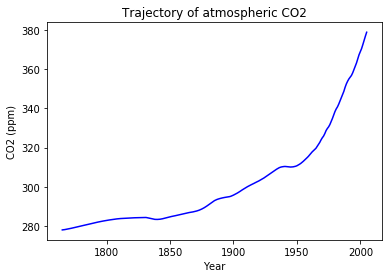

In [34]:
fig = py.figure(1)
py.plot(date, CO2obs, color='blue', label='CO2')
py.xlabel('Year')
py.ylabel('CO2 (ppm)')
py.title('Trajectory of atmospheric CO2')

Text(0.5, 1.0, 'Trajectory of NPP and Rh')

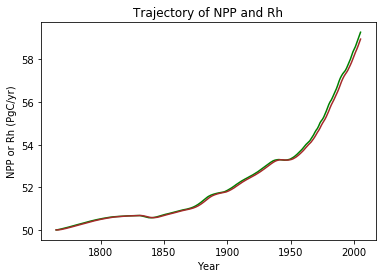

In [35]:
fig = py.figure(2)
py.plot(date, npp, color='green', label='NPP')
py.plot(date, rh, color='brown', label='Rh')
py.xlabel('Year')
py.ylabel('NPP or Rh (PgC/yr)')
py.title('Trajectory of NPP and Rh')

Text(0.5, 1.0, 'Trajectory of Cb')

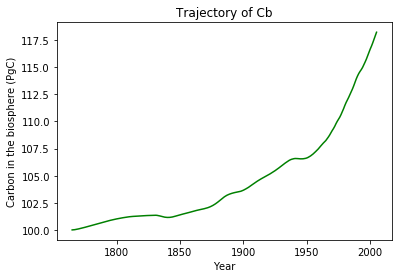

In [36]:
fig = py.figure(3)
py.plot(date, Cb, color='green', label='NPP')
py.xlabel('Year')
py.ylabel('Carbon in the biosphere (PgC)')
py.title('Trajectory of Cb')

Text(0.5, 1.0, 'Biospheric fluxes')

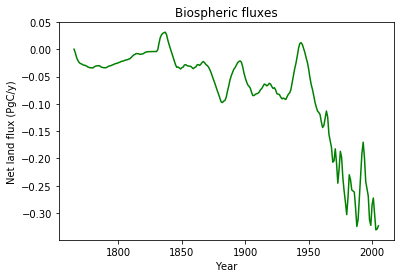

In [37]:
fig = py.figure(4)
py.plot(date, Fland, color='green', label='NPP')
py.xlabel('Year')
py.ylabel('Net land flux (PgC/y)')
py.title('Biospheric fluxes')

We can tweak the tau_b (residence time or turnover time). In an agricultural planet, tau would be smaller (faster turnover), and the land sink would be much smaller. Rh wouldn't lag behind NPP as much and there would be more carbon in the atmosphere.

### 2. Calculating a map of SST trend

Download the monthly means file from https://www.esrl.noaa.gov/psd/data/gridded/data.cobe.html  (152 MB)

In [42]:
filename = 'sst.mon.mean.nc'